<a href="https://colab.research.google.com/github/TheFckReal/LMM-lecture/blob/main/mixed_linearmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Немного теории

Смешанные линейные модели - это расширение простых линейных моделей, учитывающие те допущения о нормальности распределения случайных эффектов (ошибок), которые мы делаем при создании обычных линейных моделей.


𝕐 = 𝕏β + ɛ, где ɛᵢ ~ 𝒩(0; σ^2)

Как мы видим, в стандартной модели все ошибки лежат возле нуля, однако в реальности это далеко не всегда так. К примеру:

*   Мы можем проводить эксперимент, желая узнать, работает ли лекарство и будем случайно давать пустышку или лекарство одному и тому же человеку.

*   Мы можем проводить эксперимент, измеряя уровень знаний школьников из разных школ.

*   Или же наши итоговые данные могут быть сгруппированы на еще более высоком уровне.

Все эти эти примеры представляют из себя зависимости данных на разных уровнях зависимости.

1 случай - это самый низкий уровень иерархии, который является единицей анализа (unit of analysis), т.е. человеком, компанией, лекарствами и т.д. В уравнении группировка имеет i-ый индекс.

2 случай - это следующий уровень иерархии данных, который представляет из себя сгруппированные данные 1-го уровня. В уравнении группировка имеет j-ый индекс.

3 случай - это еще более высокий уровень группировки данных 2-го уровня.
И такую схему можно продолжать еще долго. Подобные зависимости могут приводить к статистически значимым искажениям нашей модели.







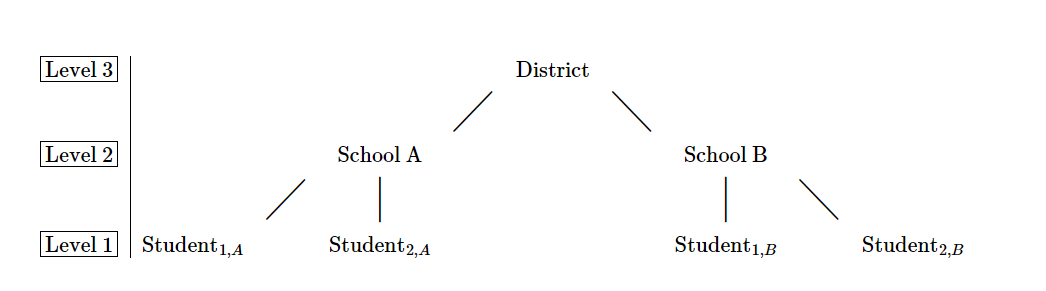



Чтобы закрепить эту концепцию, представьте себе исследование результатов учащихся, измеряемых с помощью стандартизированного теста. Школьным округам не были предоставлены ни учебная программа, ни рекомендации по подготовке к этому тесту. Данные для этого исследования представляют собой случайную выборку, собранную из разных школ, которые находятся в разных школьных округах штата Мичиган; каждая строка в наборе данных представляет одного учащегося. В этом примере уровень 1 - это учащийся, уровень 2 - это школа, а уровень 3 - это школьный округ.



А теперь же поговорим немного о терминологии.

**Эффектом** мы будем называть влияние независимой переменной, с помощью которой мы предсказываем значение зависимой переменной.

**Фиксированным эффектом** мы будем называть влияние независимой переменной, представляющий **основной интерес** для исследователя.

**Случайный эффект** - влияние независимой переменной, не представляющее первостепенного интереса для исследователя.

Интересным влиянием для нас может быть, например, такое влияние, что характерно для глобальной совокупности.


**Главные (фиксированные, mixed, fixed) эффекты:**


*   Независимые переменные

**Случайные (random) эффекты:**


*   Испытуемый
*   Пол
*   Возраст
*   Стимул
*   Город

И т.д...





Линейная регрессия с фиксированными эффектами:

**𝒴 = 𝐗β + 𝜀**

Линейная регрессия с фиксированными и случайными эффектами:

**𝒴 = 𝐗β + Ζγ + 𝜀**, 𝐗 - матрица фиксированных параметров,

β - вектор коэффициентов фиксированных эффектов,


Ζ - design matrix наших данных,

γ - коэффициенты случайных эффектов, γ ~ Ŋ(0; 𝐆)

𝐆 =
$\begin{pmatrix}
σ_b^2 & 0 & ... & 0\\
0 & σ_b^2 & ... & 0\\
. & . & . & .\\
0 & 0 & ... & σ_b^2\\
\end{pmatrix}$

𝜀 - вектор случайных ошибок, 𝜀 ~ Ŋ(0; 𝐑), 𝐑 = Ι*σ^2


  𝐑 =
$\begin{pmatrix}
σ^2 & 0 & ... & 0\\
0 & σ^2 & ... & 0\\
. & . & . & .\\
0 & 0 & ... & σ^2\\
\end{pmatrix}$


Источники: https://stats.oarc.ucla.edu/other/mult-pkg/introduction-to-linear-mixed-models/

Для подбора параметров фиксированных эффектов используется метод либо ограниченного максимального правдоподобия (REML), либо просто метод максимального правдоподобия (ML).

Для особенно интересующихся опишем вкратце:

Матрица ковариаций нашей модели
$$
V = Z𝐆Zᵗ + 𝐑
$$

Оценки параметров:
$$
\hat{β} = (𝐗^t\hat{V}^{-1}𝐗)^{-1} 𝐗^t\hat{V}^{-1}𝐘
$$

$$
\hat{γ} = \hat{𝐆}Z^t\hat{V}^{-1}(𝐘 - 𝐗\hat{β})
$$

где $\hat{V}$ = V(ϑ$_{ML}$) или V(ϑ$_{REML}$), так как G и R известны с точностью до параметра дисперсии ϑ


Все формулы, их вывод и непосредственно сама оценка параметра ϑ доступны по ссылке https://www2.stat.duke.edu/~sayan/Sta613/2018/lec/LMM.pdf



**Задача:**

Исследователи решили проверить, есть ли взаимосвязь между первым предметом, который видит ребенок после рождения, и первым словом, которое он произносит. В ряде клиник врачи показывали детям разные объекты и фиксировали этот факт. Через некоторое время авторы исследования собрали данные о том, какие слова были первыми у этих детей.  

Подсказка. Если каждому уровню независимой переменной (например, объект часы, утюг, ложка и т.д.) по гипотезе должен соответствовать разный уровень зависимой переменной (слова “часы”, “утюг”, “ложка”), то влияние этой переменной будет главным эффектом. Если несколько уровней независимой переменной (например, объекты: наручные часы, настенные часы, песочные часы) могут соответствовать одному и тому же уровню зависимой переменной (слово “часы”), то влияние этих различий будет случайным эффектом. Давайте для этой задачи договоримся, что всем детям предъявлялись разные объекты.
Выберите случайные эффекты из следующего списка.

Варианты ответа:


1.   Объект, который показывали
2.   Врач, который показывал ребёнку объект
3.   Клиника, в которой родился ребенок


**Задача:**

Врачи нескольких клиник решили сравнить две диеты: средиземноморскую и скандинавскую — по их влиянию на продолжительность сна. Исследователи наблюдали две группы людей, которые питались по-разному (средиземноморская или скандинавская диета), и фиксировали продолжительность сна и общее самочувствие испытуемых.
Выберите случайные эффекты из следующего списка:

Варианты ответа:

1.   Тип диеты

2.   Место проживания испытуемого

3.   Пол испытуемого

4.   Пол врача

5.   Продолжительность сна

6.   Клиника

# Немного практики

In [2]:
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import openpyxl

Загрузим наш датасет и посмотрим данные, с которыми мы будем работать

In [3]:
url = 'https://raw.githubusercontent.com/razority/R_data/main/Exam.xlsx'
exam = pd.read_excel(url)

exam['school'] = exam['school'].astype(str)
exam.head(5)

,school,normexam,schgend,schavg,vr,intake,standLRT,sex,type,student
0,1,0.261324,mixed,0.166175,mid 50%,bottom 25%,0.619059,F,Mxd,143
1,1,0.134067,mixed,0.166175,mid 50%,mid 50%,0.205802,F,Mxd,145
2,1,-1.723882,mixed,0.166175,mid 50%,top 25%,-1.364576,M,Mxd,142
3,1,0.967586,mixed,0.166175,mid 50%,mid 50%,0.205802,F,Mxd,141
4,1,0.544341,mixed,0.166175,mid 50%,mid 50%,0.371105,F,Mxd,138


Нас будут интересовать standLRT (оценка стандартного экзамена по английскому языку) и normexam (нормализованная оценка выпускных экзаменов школьников). Мы хотим изучить взаимосвязь оценки выпускных экзаменов с экзаменом по английскому. То есть влияние standLRT на normexam.

Давайте сначала визуализируем наши данные.

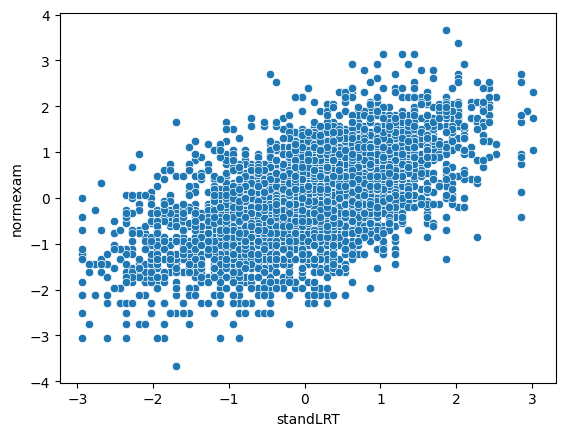

In [5]:
g = sns.scatterplot(x='standLRT', y='normexam', data=exam)
plt.show()

А теперь же попробуем сделать небольшую разбивку наших данных.

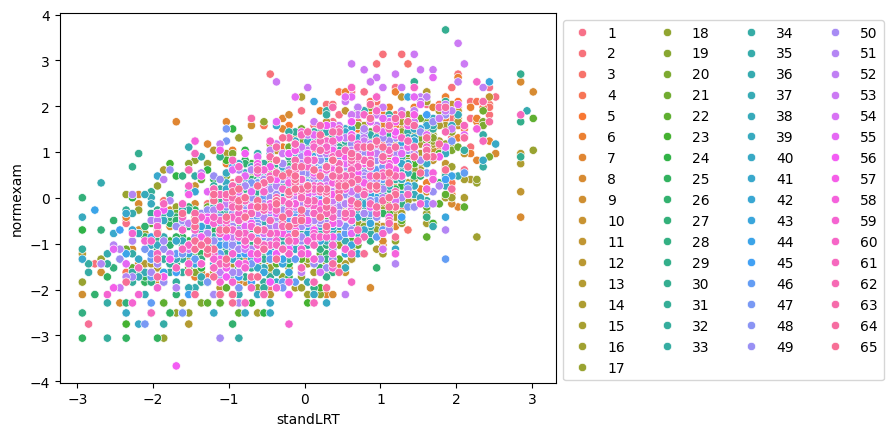

In [4]:
g = sns.scatterplot(x='standLRT', y='normexam', hue='school', data=exam)
# делаем легенду удобочитаемой
h, l = g.get_legend_handles_labels()
g.legend(h, l, ncol=4, bbox_to_anchor=(1, 1), loc=2)
plt.show()

Теперь же построим непосредственно линейную регрессию.

                            OLS Regression Results                            
Dep. Variable:               normexam   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     2185.
Date:                Thu, 02 May 2024   Prob (F-statistic):               0.00
Time:                        15:09:18   Log-Likelihood:                -4880.3
No. Observations:                4059   AIC:                             9765.
Df Residuals:                    4057   BIC:                             9777.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0012      0.013     -0.094      0.9

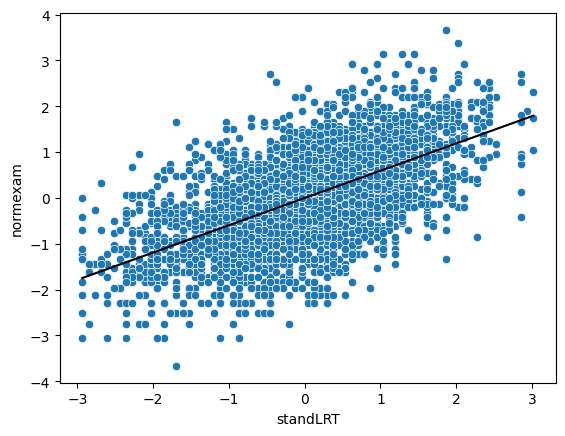

In [6]:
model = smf.ols('normexam ~ standLRT', data=exam).fit()
print(model.summary())
sns.scatterplot(x='standLRT', y='normexam', data=exam)
sns.lineplot(x = exam.loc[:, 'standLRT'], y = model.predict(exam.loc[:, 'standLRT']), color='black')
plt.show()

Отлично, наш предиктор статистически значим и мы получаем достаточно красивую линию. Построим теперь нашу смешанную модель, считая случайным эффектом школы

In [7]:
model_mixed = smf.mixedlm('normexam ~ standLRT', data=exam, groups=exam['school']).fit()
print(model_mixed.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: normexam  
No. Observations: 4059    Method:             REML      
No. Groups:       65      Scale:              0.5659    
Min. group size:  2       Log-Likelihood:     -4684.3826
Max. group size:  198     Converged:          Yes       
Mean group size:  62.4                                  
---------------------------------------------------------
           Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
---------------------------------------------------------
Intercept  0.002     0.040   0.058  0.954  -0.077   0.081
standLRT   0.563     0.012  45.106  0.000   0.539   0.588
Group Var  0.094     0.025                               



Посмотрим, как изменится график, если мы будем изменять лишь только свободный член и будем выводить его для каждой школы

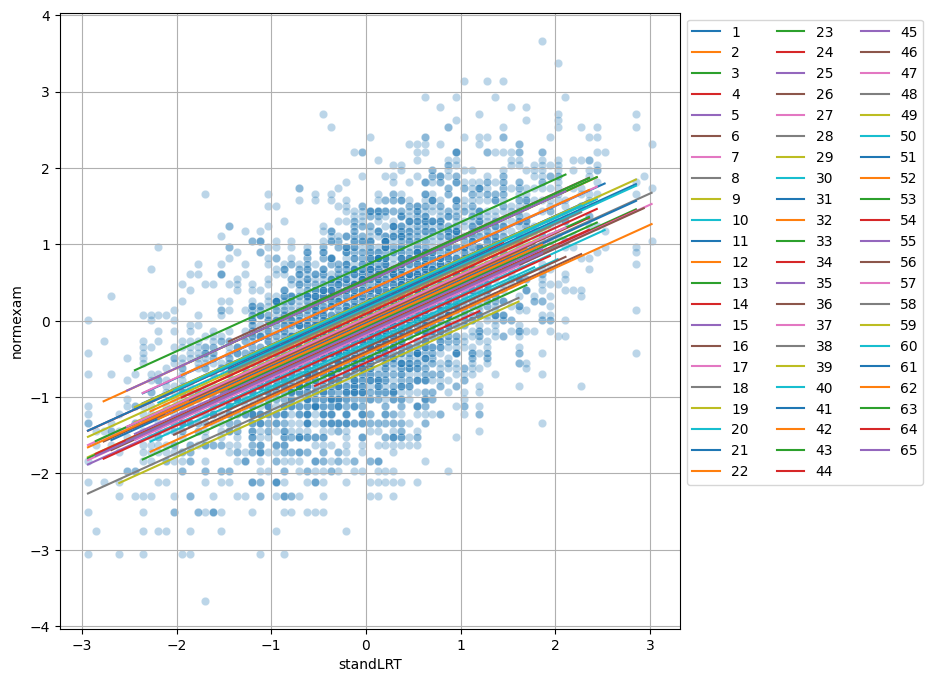

In [21]:
# Наша функция предсказания с учетом случайных эффектов
def predict_mixed(data, school, result, has_intercept: bool, has_slope: bool):
    re = result.random_effects
    design_matrix = np.array([])

    if has_intercept:
        design_matrix = np.ones((data.shape[0], 1))
    if has_slope:
        if has_intercept:
            design_matrix = np.column_stack([design_matrix, np.array(data)])
        else:
            design_matrix = np.array(data).reshape((-1, 1))

    rex = design_matrix @ np.array(re[school])  # В литературе обозначается как Zu

    yp = result.predict(data) + rex # Суммируем фиксированные и случайные эффекты для получения предсказания
    return yp

# Непосредственно сам график
plt.figure(figsize=(8,8))
sns.scatterplot(x='standLRT', y='normexam', data=exam, alpha = .3)

for school in exam['school'].unique():
    founded_exam = exam[exam['school'] == school]['standLRT']
    yp = predict_mixed(founded_exam, school, model_mixed, has_intercept=True, has_slope=False)
    sns.lineplot(x=founded_exam, y=yp, legend = 'full', label = school)

plt.legend(ncol=3, bbox_to_anchor=(1., 1.))
plt.grid()

Красиво, но нереалистично. Попробуем теперь добавить наклон наших прямых

In [22]:
model_mixed_slope = smf.mixedlm('normexam ~ standLRT', data=exam, groups=exam['school'], re_formula='~ standLRT').fit()
print(model_mixed_slope.summary())

             Mixed Linear Model Regression Results
Model:               MixedLM   Dependent Variable:   normexam  
No. Observations:    4059      Method:               REML      
No. Groups:          65        Scale:                0.5536    
Min. group size:     2         Log-Likelihood:       -4663.8002
Max. group size:     198       Converged:            Yes       
Mean group size:     62.4                                      
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept            -0.012    0.040 -0.290 0.772 -0.090  0.067
standLRT              0.557    0.020 27.588 0.000  0.517  0.596
Group Var             0.092    0.025                           
Group x standLRT Cov  0.018    0.010                           
standLRT Var          0.015    0.006                           



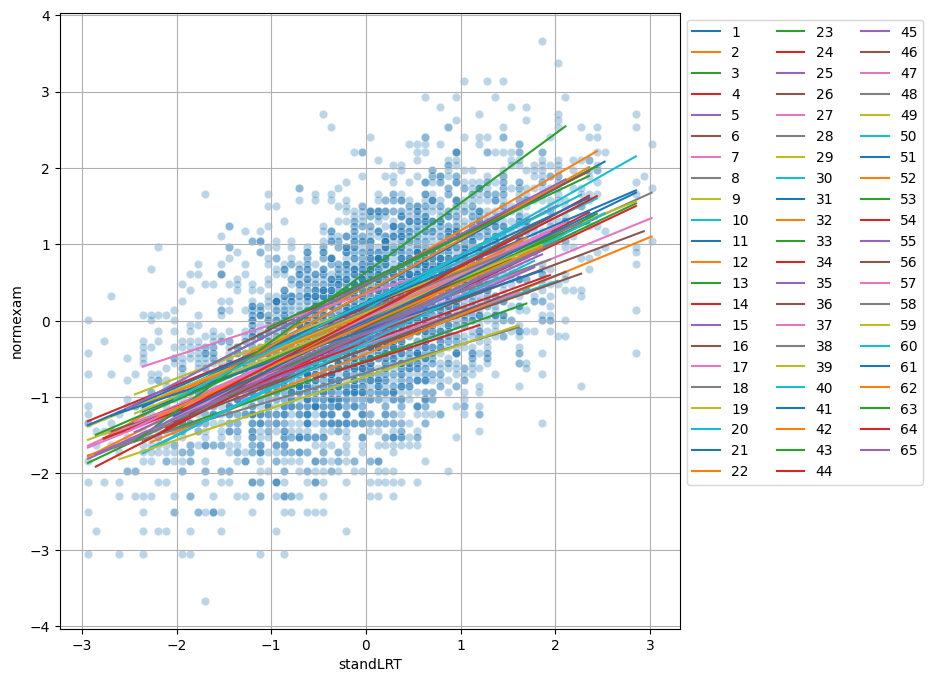

In [23]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='standLRT', y='normexam', data=exam, alpha = .3)

# задаём только и slope и intercept для каждой школы
for school in exam['school'].unique():
    founded_exam = exam[exam['school'] == school]['standLRT']
    yp = predict_mixed(founded_exam, school, model_mixed_slope, has_intercept=True, has_slope=True)
    sns.lineplot(x=founded_exam, y=yp, legend = 'full', label = school)

plt.legend(ncol=3, bbox_to_anchor=(1., 1.))
plt.grid()

И теперь мы имеем средние для каждого множества standLRT, сгруппированных по школам. Мы сделали это для того, чтобы показать явную коррелированность между случайными эффектами и нашей зависимой переменной

## Задача:
1. Измените предыдущий код так, чтобы мы в нашей смешанной модели учитывали лишь наклоны, которые дают смешанные эффекты (то есть с slopes, но без intercept). Подсказка: новая формула будет '0 + standLRT'.

2. Перед запуском кода подумайте, как будет выглядеть наш график. Почему?